## featureCounts from Rsubread package to generate counts matrix

### this notebook is the same as featureCounts.ipynb, BUT this includes a filter in analysis for log2FoldChange

already generated the matrices for analysis (see featureCounts.ipynb) so just reading in files here

In [1]:
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’

In [2]:
metaf_counts <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/sam_files/fc_counts.txt', header=TRUE)
dim(metaf_counts) # 38,828 genes total
head(metaf_counts)

[1] 38828    32

,GeneID,Length,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,X2018..BPR.BPG.O38.CV_alignment.sam,X2018..WBV.WBO.W23.CV_alignment.sam,X2018..BBO.BBO.B16.CV_alignment.sam,X2018..BPR.BPR.O02.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,118,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111126949,2254,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111110729,2083,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111112434,1023,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111120752,1070,2,1,0,2,0,0,0,2,⋯,0,0,0,1,1,0,1,0,1,0
6,LOC111128944,1773,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


looks like this is counts for meta-features and not features -> because of this:

Features : 726075                                                       ||
Meta-features : 38828

doing this for features instead of meta-features - had accidentally set useMetaFeatures=FALSE

#### featureCounts on Features

In [3]:
# reading in the txt file as a data frame
feature_counts <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/sam_files/fc_feature_counts.txt', header=TRUE)
dim(feature_counts) # 726,075 features total
head(feature_counts)

[1] 726075     32

,GeneID,Length,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,X2018..BPR.BPG.O38.CV_alignment.sam,X2018..WBV.WBO.W23.CV_alignment.sam,X2018..BBO.BBO.B16.CV_alignment.sam,X2018..BPR.BPR.O02.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,26,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,54,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,38,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,113,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,1034,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,152,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


so now have new counts matrix that contains counts of reads for all features (*not* meta-features) 

next step is to run DESeq on this

#### formatting and cleaning dataframes before analysis

In [4]:
# read in meta data of samples
meta_data <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')
head(meta_data)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


**working with the counts matrix of features**

In [5]:
# clean up column names of the feature counts matrix
#colnames(feature_counts) = c('GeneID','Length', meta_data$unique_ID)
head(colnames(feature_counts))

head(meta_data$unique_ID)

## THESE DO NOT MATCH - CANNOT SIMPLY ASSIGN!! ##

[1] "GeneID"                              "Length"                             
[3] "X2018..BBB.WBO.B21.CV_alignment.sam" "X2018..BPO.BPO.O16.CV_alignment.sam"
[5] "X2018..WBR.BBY.W25.CV_alignment.sam" "X2018..BBB.WBV.B70.CV_alignment.sam"

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
[6] "BBO-WBV-B64"

In [6]:
# cleaning up the column names of feature_counts 
# code generated with ChatGPT

# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(feature_counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(feature_counts) = cleaned_column_names2
head(feature_counts)

[1] "GeneID"      "Length"      "BBB.WBO.B21" "BPO.BPO.O16" "WBR.BBY.W25"
[6] "BBB.WBV.B70"

[1] "GeneID"      "Length"      "BBB-WBO-B21" "BPO-BPO-O16" "WBR-BBY-W25"
[6] "BBB-WBV-B70"

,GeneID,Length,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,26,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,54,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,38,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,113,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,1034,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,152,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
# removing the legnth column
feature_counts2 <- feature_counts[,-2]
head(feature_counts2)

,GeneID,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,WBV-WBR-W12,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


in order to do DESeq analysis -> need the number of columns of the counts matrix to equal the number of rows in the meta data 

the first time I did DESeq - each row of the counts matrix was a unique gene (meta-feature), so made it easy to set that as the rowname - now, each row is a feature so there are multiple rows with the same gene name - can arbitrarily label them a number, but might make it difficult later to match up the gene/feature names...

In [8]:
length(colnames(feature_counts2)) #31
length(rownames(meta_data)) #30
# number of columns in feature_counts != number of rows in meta_data

[1] 31

[1] 30

In [9]:
# remove gene name column
fc_matrix <- feature_counts2[,-1]
head(fc_matrix)

,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,WBV-WBR-W12,BBO-BBY-B27,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
length(colnames(fc_matrix)) #30
length(rownames(meta_data)) #30

[1] 30

[1] 30

**working with the counts matrix for META features (genes)**

In [11]:
# removing the length column
meta_counts <- metaf_counts[,-2]
head(meta_counts)

,GeneID,X2018..BBB.WBO.B21.CV_alignment.sam,X2018..BPO.BPO.O16.CV_alignment.sam,X2018..WBR.BBY.W25.CV_alignment.sam,X2018..BBB.WBV.B70.CV_alignment.sam,X2018..BPR.BPG.O38.CV_alignment.sam,X2018..WBV.WBO.W23.CV_alignment.sam,X2018..BBO.BBO.B16.CV_alignment.sam,X2018..BPR.BPR.O02.CV_alignment.sam,X2018..WBV.WBR.W12.CV_alignment.sam,⋯,X2018..WPO.BPO.G16.CV_alignment.sam,X2018..BBR.BBG.B38.CV_alignment.sam,X2018..WBG.WBG.W44.CV_alignment.sam,X2018..WPO.BPY.G28.CV_alignment.sam,X2018..BBR.BBY.B26.CV_alignment.sam,X2018..WBO.BBR.W03.CV_alignment.sam,X2018..WPR.BPY.G25.CV_alignment.sam,X2018..BBY.WBG.B42.CV_alignment.sam,X2018..WBO.WBV.W64.CV_alignment.sam,X2018..WPV.BPR.G11.CV_alignment.sam
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111110729,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111112434,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111120752,2,1,0,2,0,0,0,2,0,⋯,0,0,0,1,1,0,1,0,1,0
6,LOC111128944,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(meta_counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(meta_counts) = cleaned_column_names2
head(meta_counts)

[1] "GeneID"      "BBB.WBO.B21" "BPO.BPO.O16" "WBR.BBY.W25" "BBB.WBV.B70"
[6] "BPR.BPG.O38"

[1] "GeneID"      "BBB-WBO-B21" "BPO-BPO-O16" "WBR-BBY-W25" "BBB-WBV-B70"
[6] "BPR-BPG-O38"

,GeneID,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,WBV-WBR-W12,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111110729,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111112434,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111120752,2,1,0,2,0,0,0,2,0,⋯,0,0,0,1,1,0,1,0,1,0
6,LOC111128944,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
# setting the gene ID names as the rownames so we can pull out the ID later after analysis
rownames(meta_counts) <- meta_counts$GeneID
head(meta_counts)

,GeneID,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,WBV-WBR-W12,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111116054,LOC111116054,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
LOC111126949,LOC111126949,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111110729,LOC111110729,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111112434,LOC111112434,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111120752,LOC111120752,2,1,0,2,0,0,0,2,0,⋯,0,0,0,1,1,0,1,0,1,0
LOC111128944,LOC111128944,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
# removing the geneID
meta_counts2 <- meta_counts[,-1]
head(meta_counts2)

,BBB-WBO-B21,BPO-BPO-O16,WBR-BBY-W25,BBB-WBV-B70,BPR-BPG-O38,WBV-WBO-W23,BBO-BBO-B16,BPR-BPR-O02,WBV-WBR-W12,BBO-BBY-B27,⋯,WPO-BPO-G16,BBR-BBG-B38,WBG-WBG-W44,WPO-BPY-G28,BBR-BBY-B26,WBO-BBR-W03,WPR-BPY-G25,BBY-WBG-B42,WBO-WBV-W64,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111116054,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
LOC111126949,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111110729,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111112434,0,0,0,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111120752,2,1,0,2,0,0,0,2,0,0,⋯,0,0,0,1,1,0,1,0,1,0
LOC111128944,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
# double checking that the number of columns in the counts matrix matches the rows in the meta data
dim(meta_counts2) # 30 columns
dim(meta_data) # 30 rows

[1] 38828    30

[1] 30 13

#### Pre-filtering
filtering out any rows with less than 10 reads total per row

In [16]:
meta_counts2 <- meta_counts2[-which(rowSums(meta_counts2[sapply(meta_counts2, is.numeric)]) < 10),]
dim(meta_counts2)

[1] 13544    30

#### ALSO - samples must be in the same order for the counts matrix AND meta data

In [17]:
# setting unique_ID as the row name
rownames(meta_data) <- meta_data$unique_ID
head(meta_data)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


In [18]:
# checking if samples are in the right order
colnames(meta_counts2)
rownames(meta_data)
all(rownames(meta_data) == colnames(meta_counts2)) # FALSE - not in the same order

[1] "BBB-WBO-B21" "BPO-BPO-O16" "WBR-BBY-W25" "BBB-WBV-B70" "BPR-BPG-O38"
 [6] "WBV-WBO-W23" "BBO-BBO-B16" "BPR-BPR-O02" "WBV-WBR-W12" "BBO-BBY-B27"
[11] "BPY-BPG-O42" "WBY-BBV-W65" "BBO-WBO-B16" "BPY-BPY-O29" "WBY-BBY-W30"
[16] "BBO-WBV-B64" "WBB-WBV-W69" "WPB-BPG-G45" "BBR-BBB-B50" "WBG-BBB-W56"
[21] "WPO-BPO-G16" "BBR-BBG-B38" "WBG-WBG-W44" "WPO-BPY-G28" "BBR-BBY-B26"
[26] "WBO-BBR-W03" "WPR-BPY-G25" "BBY-WBG-B42" "WBO-WBV-W64" "WPV-BPR-G11"

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "BPO-BPO-O16" "BPR-BPG-O38" "BPR-BPR-O02" "BPY-BPG-O42" "BPY-BPY-O29"
[16] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[21] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"
[26] "WPB-BPG-G45" "WPO-BPO-G16" "WPO-BPY-G28" "WPR-BPY-G25" "WPV-BPR-G11"

[1] FALSE

In [19]:
fc_meta <- meta_counts2[,rownames(meta_data)]
all(rownames(meta_data) == colnames(fc_meta))

[1] TRUE

In [20]:
# doing the same thing for features
fc_matrix <- fc_matrix[,rownames(meta_data)]
all(rownames(meta_data) == colnames(fc_matrix))

[1] TRUE

#### data frames/variables moving forward:
- **meta_data**: meta info on samples including treatment info
- **fc_meta**: counts matrix for META features (genes)
- **fc_matrix**: counts matrix for features (like exons)

### running DESeq2 on **META feature (e.g. genes)**

#### effects of phase 1, ingoring phase 2

In [21]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 607 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase1_control_vs_both" "Phase1_hypoxic_vs_both"
[4] "Phase1_warm_vs_both"

In [22]:
# specify contrasts (what treatments to compare)
contrast1 <- c("Phase1", "hypoxic", "control")
contrast2 <- c("Phase1", "both", "control")
contrast3 <- c("Phase1", "warm", "control")

In [23]:
# storing results in variables to call for EnhancedVolcano 

# Phase 1 hypoxic vs. control
results1 <- results(p1_dds, contrast = contrast1, alpha=0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')

# Phase 1 both vs. control
results2 <- results(p1_dds, contrast = contrast2, alpha=0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')

# Phase 1 warm vs. control
results3 <- results(p1_dds, contrast = contrast3, alpha=0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



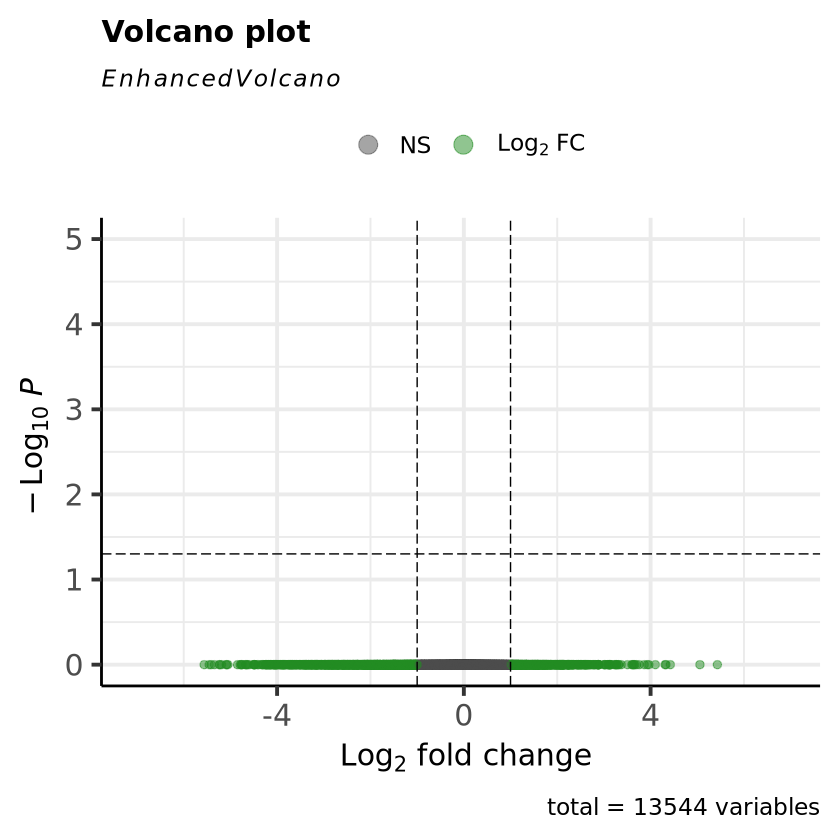

In [24]:
# phase 1 hypoxic vs. control
summary(results1)

EnhancedVolcano(results1, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



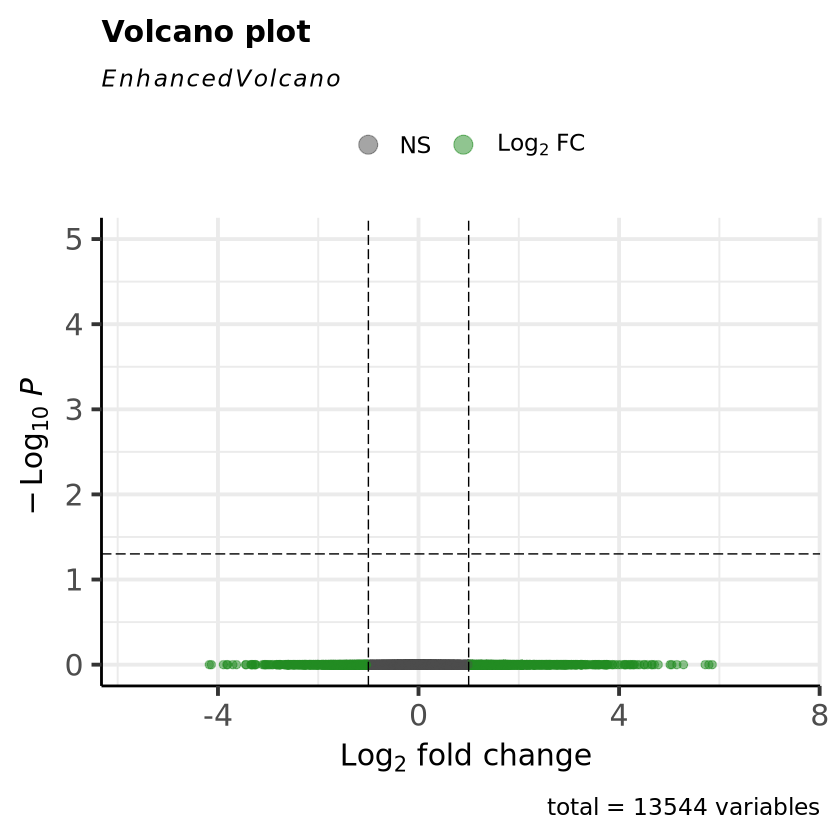

In [25]:
# phase 1 both vs. control
summary(results2)

EnhancedVolcano(results2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 71, 0.52%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 8609, 64%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



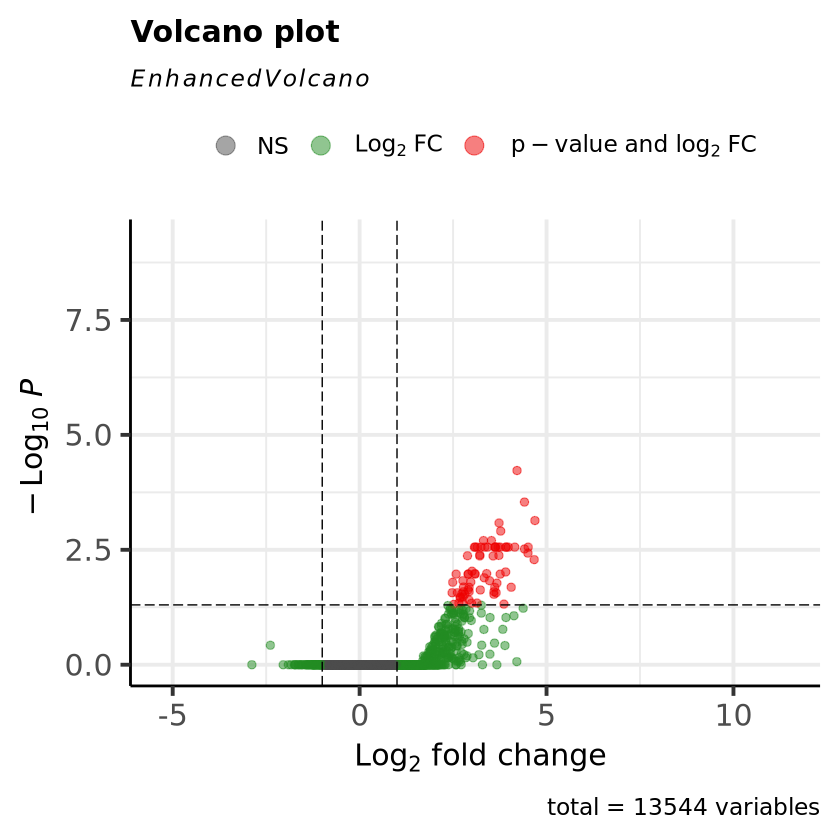

In [26]:
# phase 1 warm vs. control
summary(results3)

EnhancedVolcano(results3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

In [27]:
head(results3)

log2 fold change (MLE): Phase1 warm vs control 
Wald test p-value: Phase1 warm vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC111120752   0.917103       0.989790  1.369276  0.000000  1.000000        NA
LOC111109452   1.369236       2.086234  1.624278  0.668749  0.503656        NA
LOC111124802 160.733119       0.467791  0.191408  0.000000  1.000000         1
LOC111101273  55.040476       0.420072  0.231751  0.000000  1.000000         1
LOC111101250  77.794778      -0.615532  0.207942  0.000000  1.000000         1
LOC111101262 188.903905       0.170691  0.182515  0.000000  1.000000         1

now want to save the genes with adjusted p-value < 0.05 and |lfc| > 1 into a csv file to use for KEGG analysis

In [28]:
### saving UNFILTERED STAT sig genes into dataframe and csv file

# grabbing all sig genes for warm vs. control for phase 1
warm_v_control.sig_genes = as.data.frame(results3)

# add meta data for those genees
#sig_wc_genes = merge(warm_v_control.sig_genes, counts_meta, by="row.names")
#head(sig_wc_genes) 

# writing csv file
write.csv(warm_v_control.sig_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/LFC_FC_sig_p1wc.csv")

okay so order of samples definitely matters - now seeing ~ 700 genes that are significant!!

for Log2FoldChange filtering (lfcThreshold argument in DESeq results function) - don't think this matters since our downstream analysis is for GSEA (gene set enrichment analysis; also don't think that filtering should be done post hoc either...)

In [29]:
# saving list of genes into csv file
write.csv(as.data.frame(results3), '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/FC_sig_p1wc.csv')

both htseq-counts and this featureCounts matrix were done on META features (e.g. genes), and had roughly the same number of genes in their matrix - so interesting that they produced wildly different results for the DESeq analysis...

part of me thinks that it's possible the sample names weren't matched up correctly the first time around with htseq-counts


#### Effects of phase 2, ignoring phase 1

In [30]:
unique(meta_data$Phase2)

[1] "control" "hypoxic" "both"

In [31]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 913 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase2_control_vs_both" "Phase2_hypoxic_vs_both"

In [32]:
# specify contrasts (what treatments to compare)
contrast1 <- c("Phase2", "hypoxic", "both")
contrast2 <- c("Phase2", "both", "control")

In [33]:
# storing results in variables to call for EnhancedVolcano 

# Phase 2 hypoxic vs. both
results1 <- results(p2_dds, contrast = contrast1, alpha=0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')

# Phase 2 both vs. control
results2 <- results(p2_dds, contrast = contrast2, alpha=0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')



out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



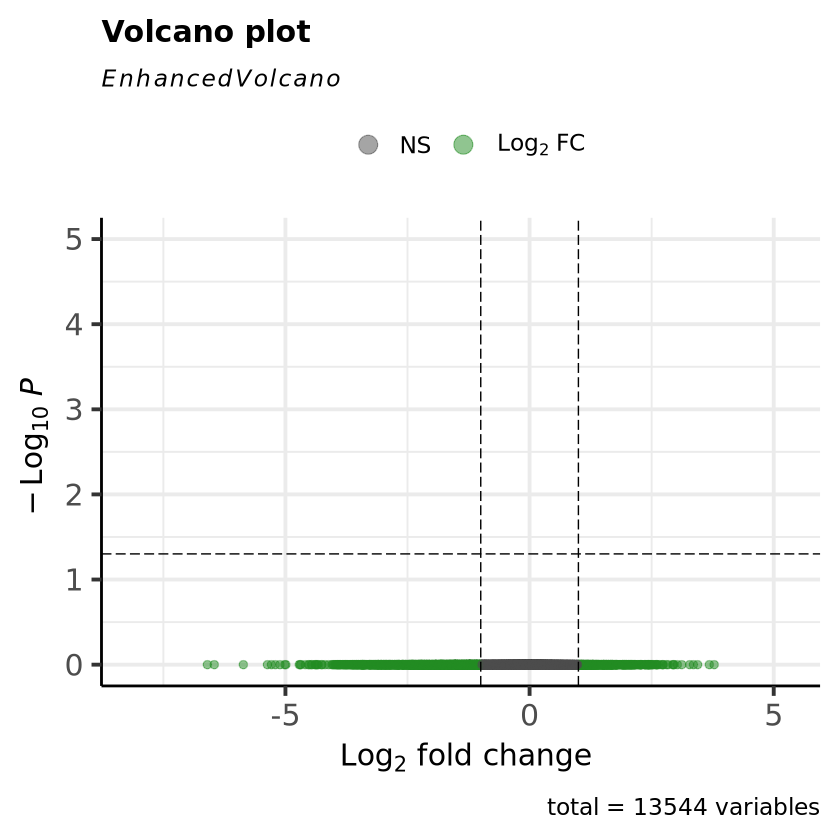

In [34]:
# phase 2 hypoxic vs. both
summary(results1)

EnhancedVolcano(results1, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



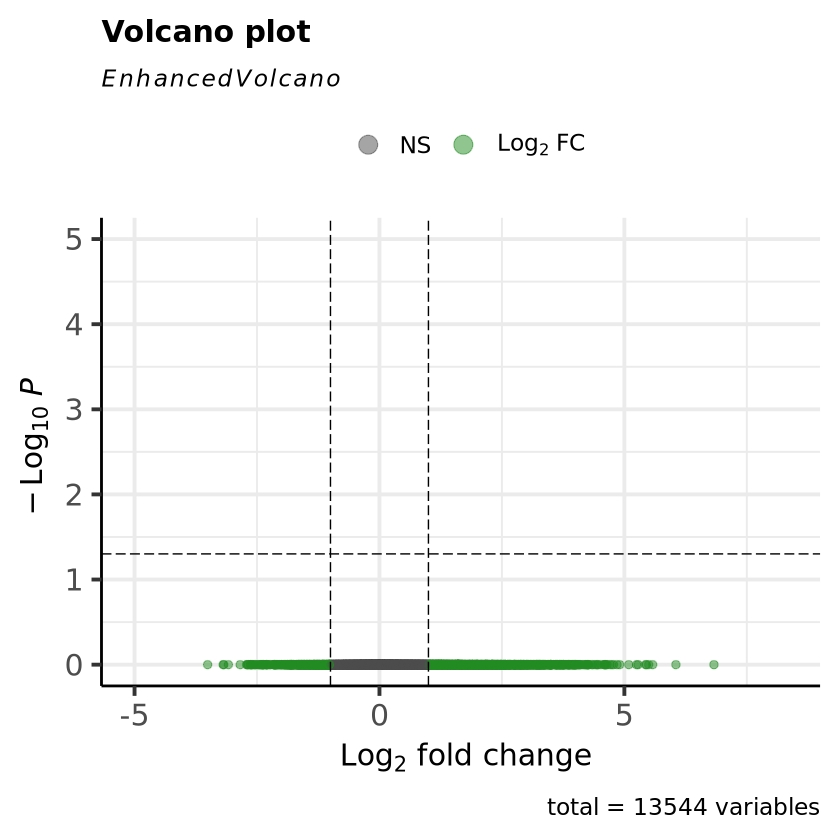

In [35]:
# phase 2 both vs. control
summary(results2)

EnhancedVolcano(results2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

#### Given phase 2, what are the effects of phase 1?
first looking at samples that were **hypoxic for phase 2**

In [36]:
# for phase 2 hypoxic
p2hypoxic_meta = filter(meta_data, meta_data$Phase2 == 'hypoxic')
p2hypoxic_meta 

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,control,hypoxic


In [37]:
# have to make sure counts matrix has the same columns as rows in meta
p2hypoxic_counts = fc_meta[,colnames(fc_meta) %in% p2hypoxic_meta$unique_ID, drop=FALSE]
head(p2hypoxic_counts)

,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,0,0,0,0,1,1,0,0,0,1
LOC111109452,0,0,10,12,0,1,0,0,1,2
LOC111124802,408,244,187,336,311,455,20,122,289,202
LOC111101273,115,75,64,115,137,127,8,43,87,81
LOC111101250,257,118,115,141,184,261,7,91,254,109
LOC111101262,502,364,246,389,355,485,40,184,387,251


In [38]:
p2h_dds <- DESeqDataSetFromMatrix(countData = p2hypoxic_counts,
                              colData = p2hypoxic_meta, 
                              design = ~ Phase1)
p2h_dds=DESeq(p2h_dds)
resultsNames(p2h_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 13371 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 190, 1.4%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



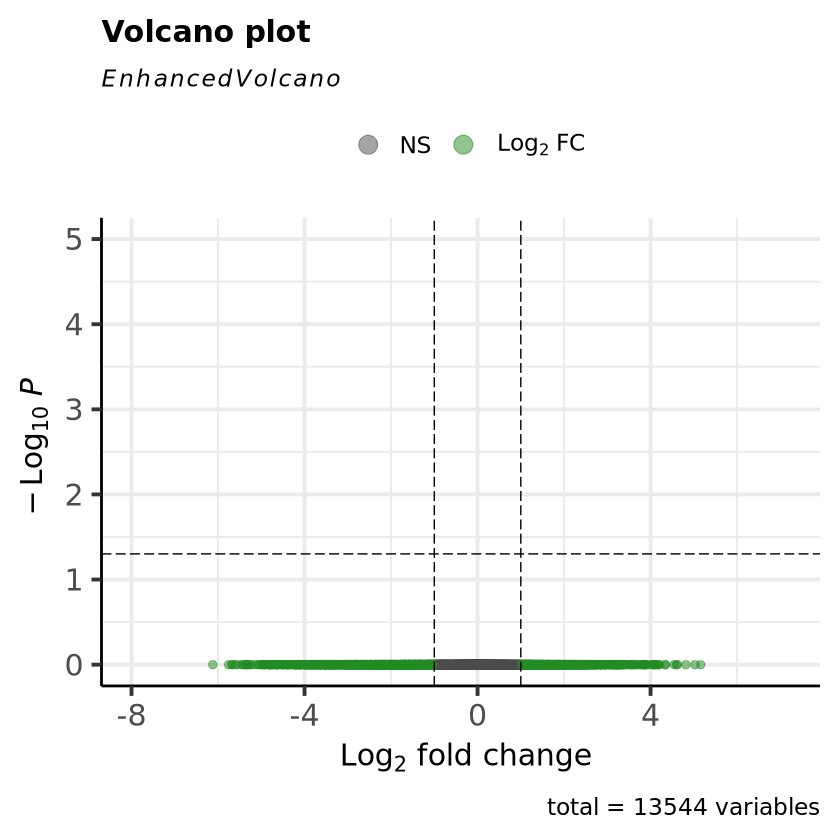

In [39]:
# phase 2 = hypoxic, looking at hypoxic vs. control for phase 1
res_p2h=results(p2h_dds, name="Phase1_hypoxic_vs_control", alpha = 0.05,lfcThreshold = 1, altHypothesis = 'greaterAbs')

summary(res_p2h)
   
EnhancedVolcano(res_p2h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

for samples that were **both for phase 2**

In [40]:
# for phase 2 both
p2both_meta = filter(meta_data, meta_data$Phase2 == 'both')
p2both_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2both_counts = fc_meta[,colnames(fc_meta) %in% p2both_meta$unique_ID, drop=FALSE]
head(p2both_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BPO-BPO-O16,2018--BPO-BPO-O16-CV,BPO-BPO-O16,BPO,BPO,O16,hypoxic,warm,O,hypoxic,warm,O,both,both
BPR-BPG-O38,2018--BPR-BPG-O38-CV,BPR-BPG-O38,BPR,BPG,O38,hypoxic,warm,R,hypoxic,warm,G,both,both
BPR-BPR-O02,2018--BPR-BPR-O02-CV,BPR-BPR-O02,BPR,BPR,O02,hypoxic,warm,R,hypoxic,warm,R,both,both
BPY-BPG-O42,2018--BPY-BPG-O42-CV,BPY-BPG-O42,BPY,BPG,O42,hypoxic,warm,Y,hypoxic,warm,G,both,both
BPY-BPY-O29,2018--BPY-BPY-O29-CV,BPY-BPY-O29,BPY,BPY,O29,hypoxic,warm,Y,hypoxic,warm,Y,both,both
WPB-BPG-G45,2018--WPB-BPG-G45-CV,WPB-BPG-G45,WPB,BPG,G45,normoxic,warm,B,hypoxic,warm,G,warm,both
WPO-BPO-G16,2018--WPO-BPO-G16-CV,WPO-BPO-G16,WPO,BPO,G16,normoxic,warm,O,hypoxic,warm,O,warm,both
WPO-BPY-G28,2018--WPO-BPY-G28-CV,WPO-BPY-G28,WPO,BPY,G28,normoxic,warm,O,hypoxic,warm,Y,warm,both
WPR-BPY-G25,2018--WPR-BPY-G25-CV,WPR-BPY-G25,WPR,BPY,G25,normoxic,warm,R,hypoxic,warm,Y,warm,both


,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,1,0,2,1,1,0,0,1,1,0
LOC111109452,1,0,0,0,1,15,0,0,3,0
LOC111124802,56,245,45,33,120,168,134,86,252,9
LOC111101273,15,83,16,5,27,71,52,38,73,1
LOC111101250,25,132,28,12,42,92,49,5,101,2
LOC111101262,67,220,55,46,76,188,131,78,283,12


In [41]:
p2both_dds <- DESeqDataSetFromMatrix(countData = p2both_counts,
                              colData = p2both_meta, 
                              design = ~ Phase1)
p2both_dds=DESeq(p2both_dds)
resultsNames(p2both_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"           "Phase1_warm_vs_both"


out of 12941 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 457, 3.5%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



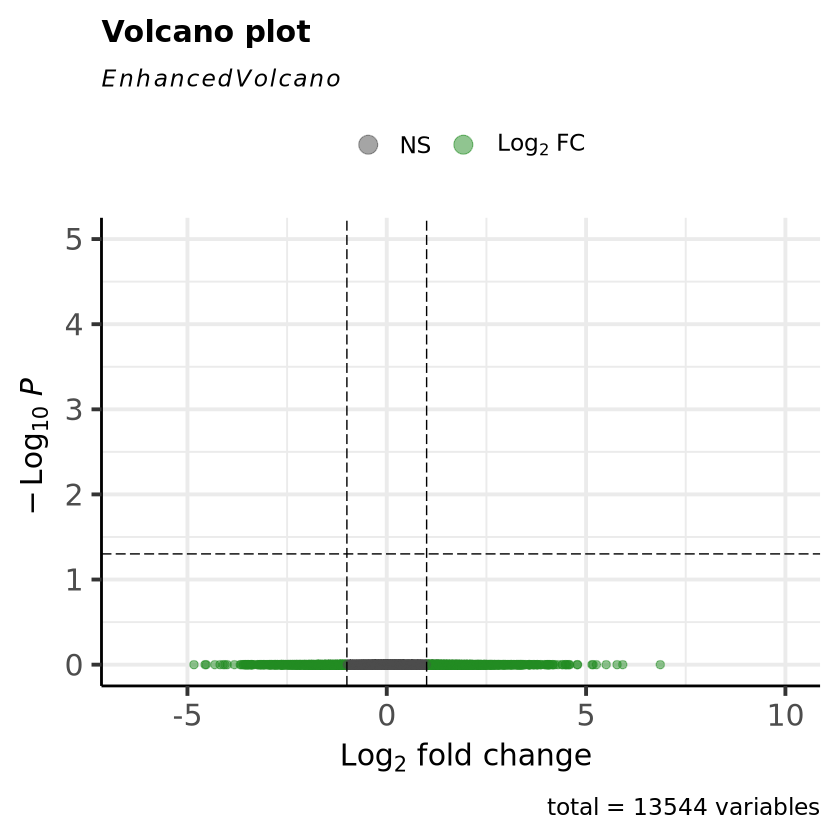

In [42]:
# phase 1 effects (warm vs. both) given phase 2 (both)
res_p2b=results(p2both_dds, name="Phase1_warm_vs_both", alpha = 0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs')

summary(res_p2b)
   
EnhancedVolcano(res_p2b,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

for samples that were in **control/ambient conditions for phase 2**

In [43]:
# for phase 2 control
p2control_meta = filter(meta_data, meta_data$Phase2 == 'control')
p2control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2control_counts = fc_meta[,colnames(fc_meta) %in% p2control_meta$unique_ID, drop=FALSE]
head(p2control_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBY-WBG-B42,2018--BBY-WBG-B42-CV,BBY-WBG-B42,BBY,WBG,B42,hypoxic,ambient,Y,normoxic,ambient,G,hypoxic,control
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,control,control


,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,2,0,0,3,0,1,0,0
LOC111109452,0,0,1,1,2,0,0,7,1,0
LOC111124802,597,453,502,434,110,418,76,305,120,57
LOC111101273,173,146,171,158,45,132,49,143,45,18
LOC111101250,253,255,327,269,49,212,56,201,96,24
LOC111101262,645,634,647,677,108,453,102,422,146,52


In [44]:
p2control_dds <- DESeqDataSetFromMatrix(countData = p2control_counts,
                              colData = p2control_meta, 
                              design = ~ Phase1)
p2control_dds=DESeq(p2control_dds)
resultsNames(p2control_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 13322 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 0, 0%
LFC < -1.00 (down) : 1, 0.0075%
outliers [1]       : 286, 2.1%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



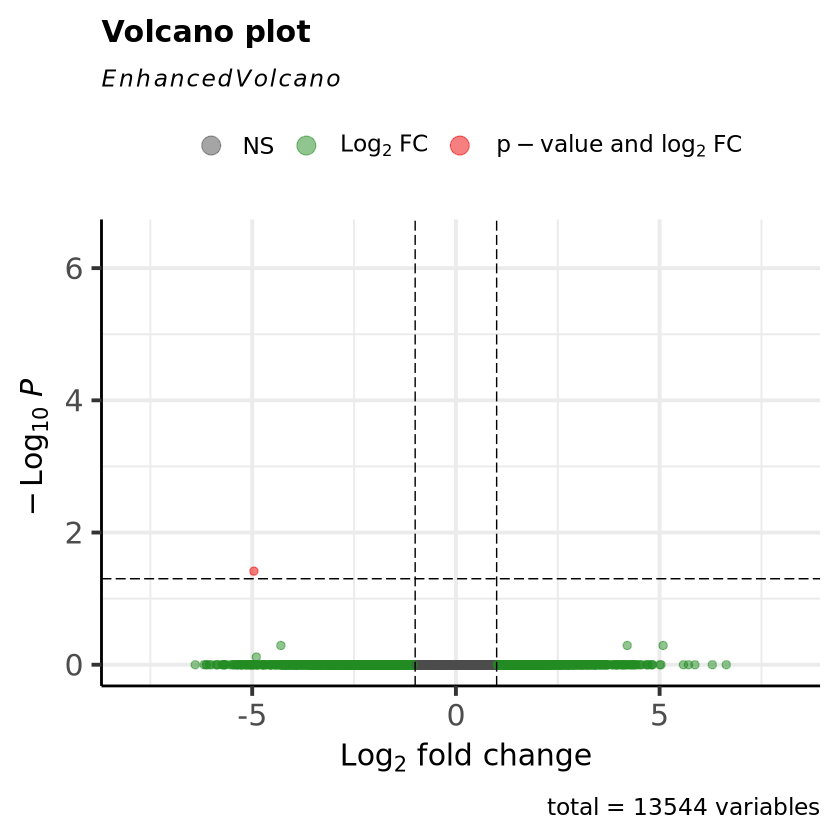

In [45]:
# effects of phase 1 (hypoxic vs. control), given phase 2 (control)
res_p2c=results(p2control_dds, name="Phase1_hypoxic_vs_control", alpha=0.05,lfcThreshold = 1, altHypothesis = 'greaterAbs')

summary(res_p2c)
   
EnhancedVolcano(res_p2c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

this is really interesting... when all samples are ambient conditions for phase 2, hypoxia has a large effect on methylation/ there seems to be a lot of differential methylation

#### Given the effects of phase 1, what are the effects of phase 2?
for samples that were **hypoxic for phase 1**

In [46]:
unique(meta_data$Phase1)

[1] "hypoxic" "both"    "control" "warm"

In [47]:
# for phase 1 hypoxic
p1hypoxic_meta = filter(meta_data, meta_data$Phase1 == 'hypoxic')
p1hypoxic_meta  

# have to make sure counts matrix has the same columns as rows in meta
p1hypoxic_counts = fc_meta[,colnames(fc_meta) %in% p1hypoxic_meta$unique_ID, drop=FALSE]
head(p1hypoxic_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic


,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2
LOC111124802,597,453,408,244,502,434,187,336,311,110
LOC111101273,173,146,115,75,171,158,64,115,137,45
LOC111101250,253,255,257,118,327,269,115,141,184,49
LOC111101262,645,634,502,364,647,677,246,389,355,108


In [48]:
p1hypoxic_dds <- DESeqDataSetFromMatrix(countData = p1hypoxic_counts,
                              colData = p1hypoxic_meta, 
                              design = ~ Phase2)
p1hypoxic_dds=DESeq(p1hypoxic_dds)
resultsNames(p1hypoxic_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"


out of 13397 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 14, 0.1%
LFC < -1.00 (down) : 1, 0.0075%
outliers [1]       : 302, 2.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



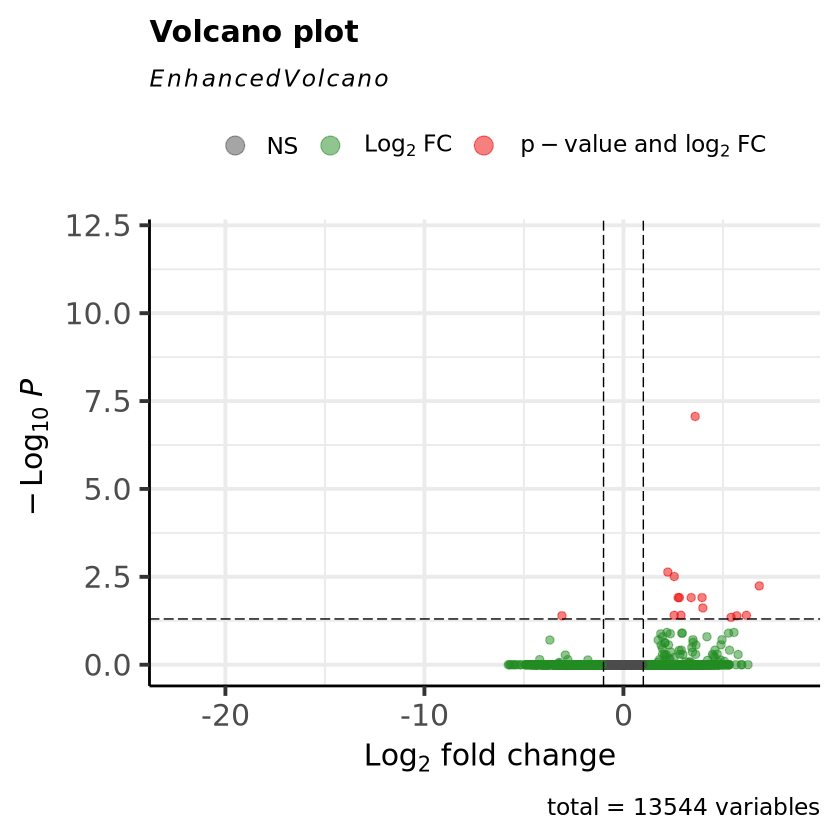

In [49]:
# effects of phase 2 (hypoxic vs. control), given phase 1 (hypoxic)
res_p1h=results(p1hypoxic_dds, name="Phase2_hypoxic_vs_control", alpha=0.05, lfcThreshold = 1)

summary(res_p1h)
   
EnhancedVolcano(res_p1h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

samples that were both for phase 1 were only both for phase 2 - so can't do any specific comparison for those samples/treatments

samples that were warm for phase 1 were only both for phase 2 - so again, can't do any analysis there

for samples that were **control for phase 1**

In [50]:
# for phase 1 contol
p1control_meta = filter(meta_data, meta_data$Phase1 == 'control')
p1control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p1control_counts = fc_meta[,colnames(fc_meta) %in% p1control_meta$unique_ID, drop=FALSE]
head(p1control_meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,control,control
WBV-WBR-W12,2018--WBV-WBR-W12-CV,WBV-WBR-W12,WBV,WBR,W12,normoxic,ambient,V,normoxic,ambient,R,control,control
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,control,hypoxic


,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic


In [51]:
p1control_dds <- DESeqDataSetFromMatrix(countData = p1control_counts,
                              colData = p1control_meta, 
                              design = ~ Phase2)
p1control_dds=DESeq(p1control_dds)
resultsNames(p1control_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"


out of 13274 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 1, 0.0075%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 175, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



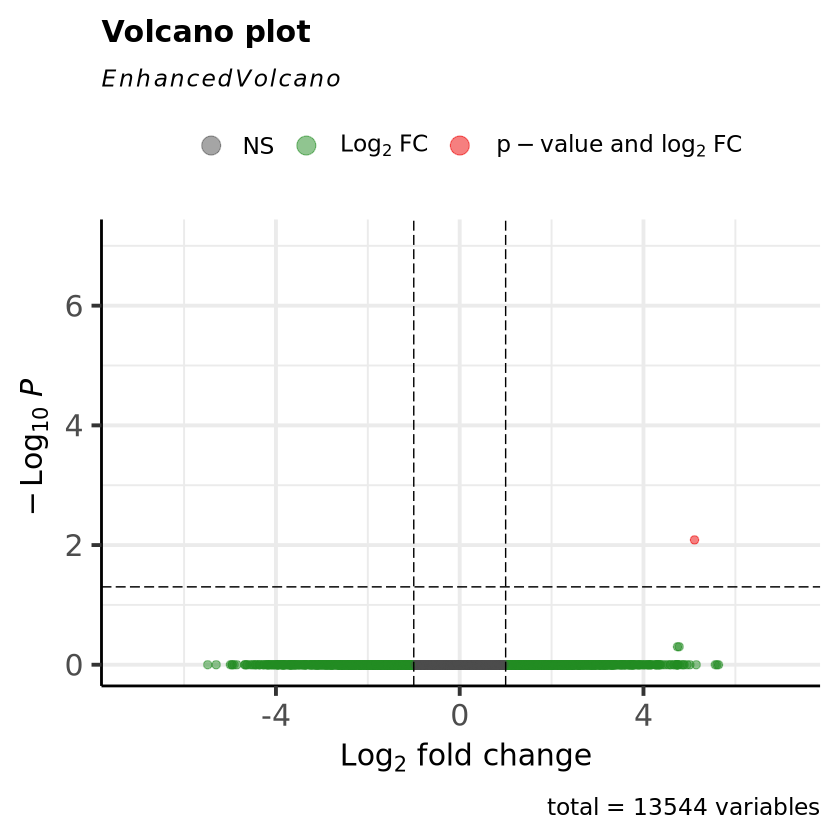

In [52]:
# effects of phase 2 (hypoxic vs. control), given phase 1 (control)
res_p1c=results(p1control_dds, name="Phase2_hypoxic_vs_control", alpha=0.05, lfcThreshold=1)

summary(res_p1c)
   
EnhancedVolcano(res_p1c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

so all significant genes dramatically drop in number

saw something interesting online about **lfc shrinkage** - going to play with it here:

In [53]:
meta_data

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic


In [54]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 913 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase2_control_vs_both" "Phase2_hypoxic_vs_both"

[lfcShrink documentation](https://rdrr.io/bioc/DESeq2/man/lfcShrink.html)

In [55]:
#BiocManager::install('apeglm')
library(apeglm)

In [56]:
contrast3 <- c("Phase1", "warm", "control")

# Phase 1 warm vs. control
results3 <- results(p1_dds, contrast = contrast3, alpha=0.05, lfcThreshold = 1)

# phase 1 warm vs. control
summary(results3)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 71, 0.52%
LFC < -1.00 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 8609, 64%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [57]:
lfc_shrink<-lfcShrink(p1_dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      #lfcThreshold = 1,
                      type="normal")
head(lfc_shrink)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): Phase1 warm vs control 
Wald test p-value: Phase1 warm vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC111120752   0.917103       0.511735  0.721948  0.722856 0.4697683        NA
LOC111109452   1.369236       1.007255  0.720575  1.284407 0.1989997        NA
LOC111124802 160.733119       0.459166  0.187997  2.443946 0.0145276 0.1249623
LOC111101273  55.040476       0.405567  0.225826  1.812600 0.0698936 0.3513925
LOC111101250  77.794778      -0.602775  0.203194 -2.960119 0.0030752 0.0392196
LOC111101262 188.903905       0.167463  0.179519  0.935214 0.3496780 0.7571724

In [58]:
head(results3)

log2 fold change (MLE): Phase1 warm vs control 
Wald test p-value: Phase1 warm vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC111120752   0.917103       0.989790  1.369276  0.000000  1.000000        NA
LOC111109452   1.369236       2.086234  1.624278  0.668749  0.503656        NA
LOC111124802 160.733119       0.467791  0.191408  0.000000  1.000000         1
LOC111101273  55.040476       0.420072  0.231751  0.000000  1.000000         1
LOC111101250  77.794778      -0.615532  0.207942  0.000000  1.000000         1
LOC111101262 188.903905       0.170691  0.182515  0.000000  1.000000         1

In [59]:
# tells you what each column means in the results table 
mcols(results3)$description

[1] "mean of normalized counts for all samples"     
[2] "log2 fold change (MLE): Phase1 warm vs control"
[3] "standard error: Phase1 warm vs control"        
[4] "Wald statistic: Phase1 warm vs control"        
[5] "Wald test p-value: Phase1 warm vs control"     
[6] "BH adjusted p-values"

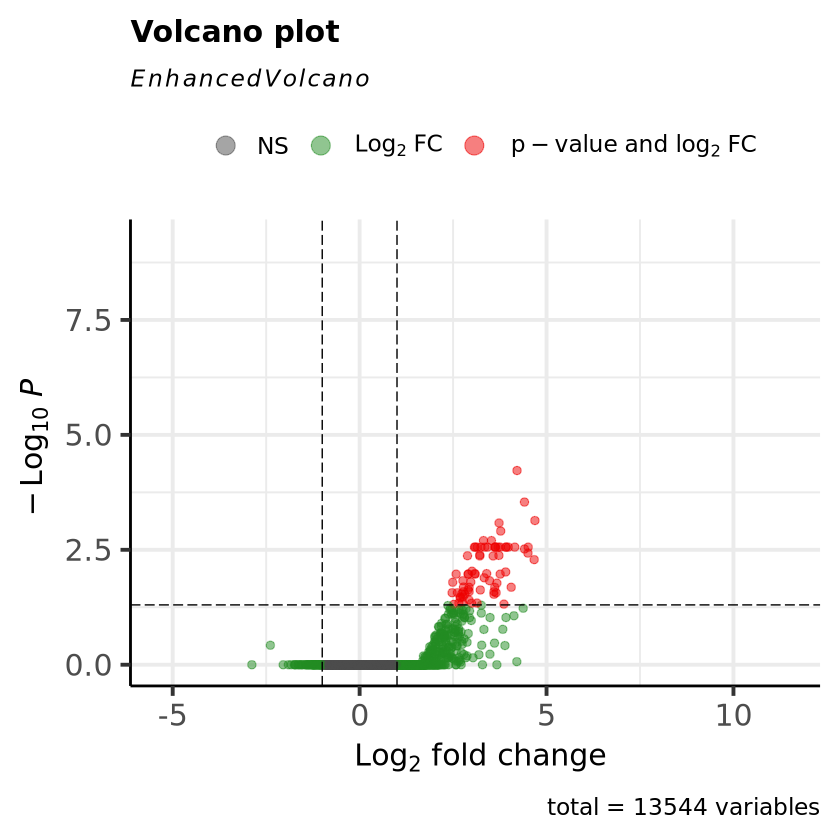

In [60]:
EnhancedVolcano(results3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

**ABOVE** is the plot of results of lfcThreshold=1

**BELOW** is the plot of results of lfc_shrink

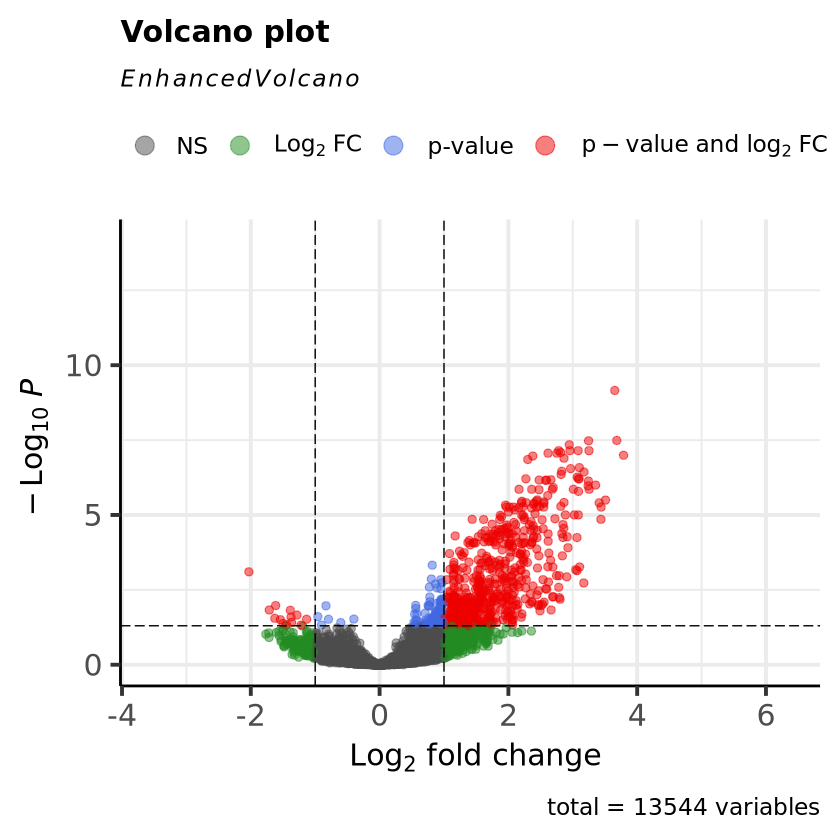

In [61]:
EnhancedVolcano(lfc_shrink, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

In [62]:
# saving list of genes into csv file
write.csv(as.data.frame(lfc_shrink), '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/lfcshrink_data.csv')

#### trying different values for lfcThreshold

want to see if lowering the lfcThreshold value from 1 will change anything...

so trying **lfcThreshold = 0.5**

In [103]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 607 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase1_control_vs_both" "Phase1_hypoxic_vs_both"
[4] "Phase1_warm_vs_both"

In [104]:
# specify contrasts (what treatments to compare)
contrast1 <- c("Phase1", "hypoxic", "control")
contrast2 <- c("Phase1", "both", "control")
contrast3 <- c("Phase1", "warm", "control")

In [105]:
# storing results in variables to call for EnhancedVolcano 

# Phase 1 hypoxic vs. control
results1 <- results(p1_dds, contrast = contrast1, alpha=0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

# Phase 1 both vs. control
results2 <- results(p1_dds, contrast = contrast2, alpha=0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

# Phase 1 warm vs. control
results3 <- results(p1_dds, contrast = contrast3, alpha=0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



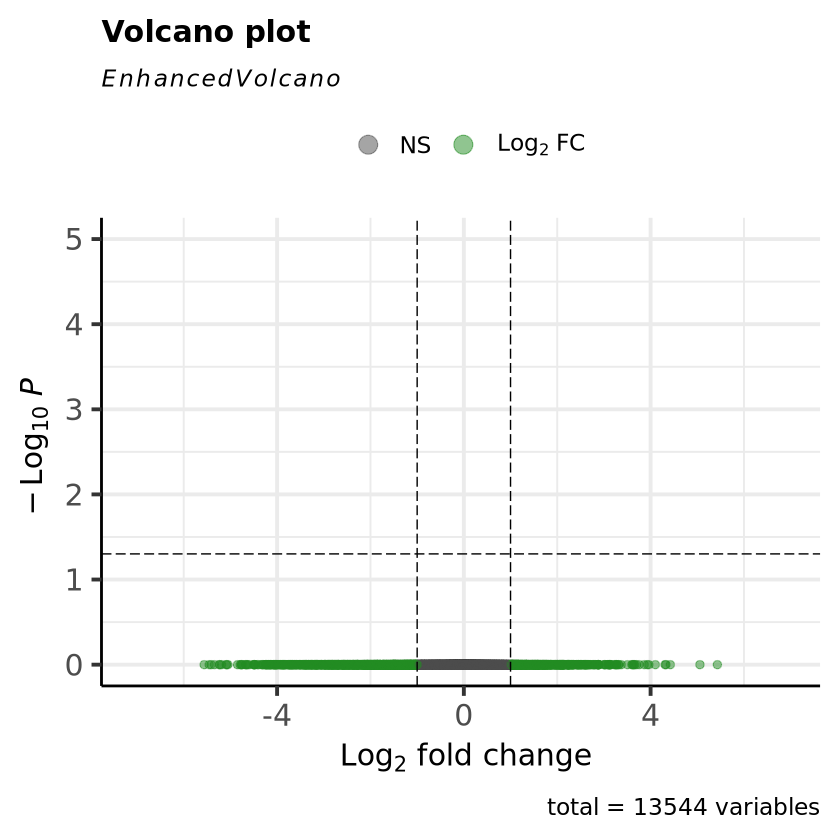

In [69]:
# phase 1 hypoxic vs. control
summary(results1)

EnhancedVolcano(results1, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 290, 2.1%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



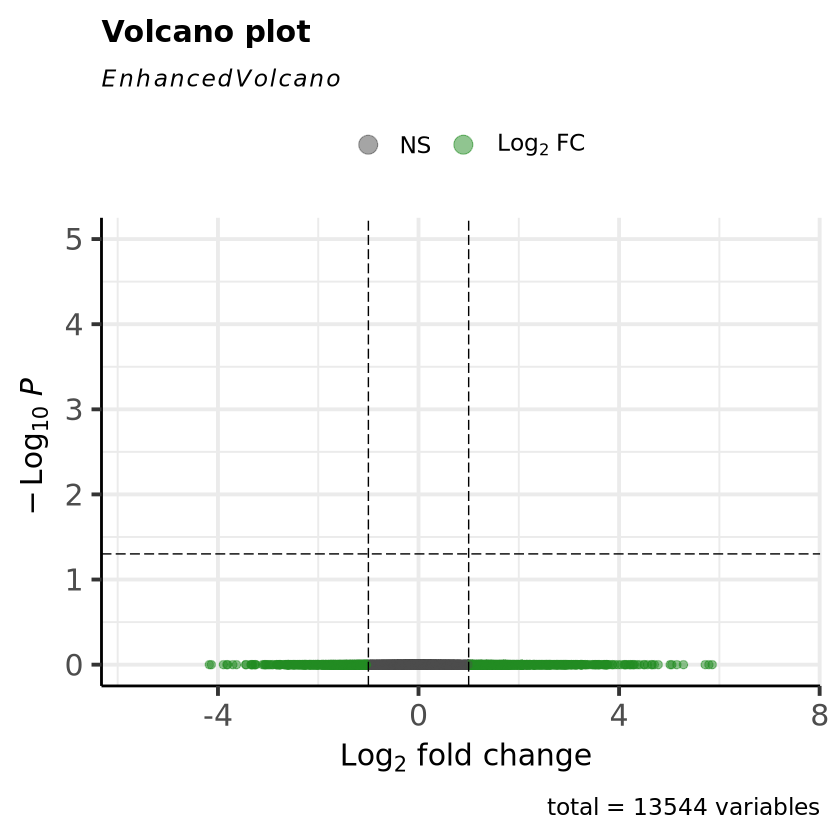

In [70]:
# phase 1 both vs. control
summary(results2)

EnhancedVolcano(results2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 241, 1.8%
LFC < -0.50 (down) : 1, 0.0074%
outliers [1]       : 290, 2.1%
low counts [2]     : 5744, 42%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



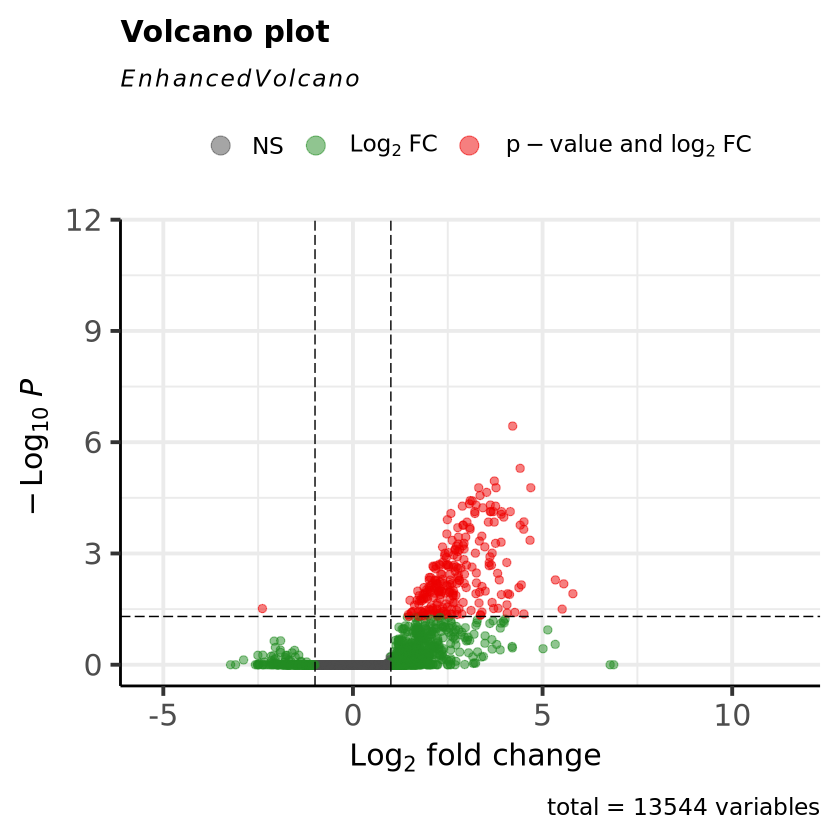

In [106]:
# phase 1 warm vs. control
summary(results3)

EnhancedVolcano(results3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

In [107]:
write.csv(results3, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/featureCounts_analysis/lfc0.5_genes_wc.txt')

#### Effects of phase 2, ignoring phase 1

In [73]:
unique(meta_data$Phase2)

[1] "control" "hypoxic" "both"

In [74]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 913 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase2_control_vs_both" "Phase2_hypoxic_vs_both"

In [75]:
# specify contrasts (what treatments to compare)
contrast1 <- c("Phase2", "hypoxic", "both")
contrast2 <- c("Phase2", "both", "control")

In [76]:
# storing results in variables to call for EnhancedVolcano 

# Phase 2 hypoxic vs. both
results1 <- results(p2_dds, contrast = contrast1, alpha=0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

# Phase 2 both vs. control
results2 <- results(p2_dds, contrast = contrast2, alpha=0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')



out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 6, 0.044%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



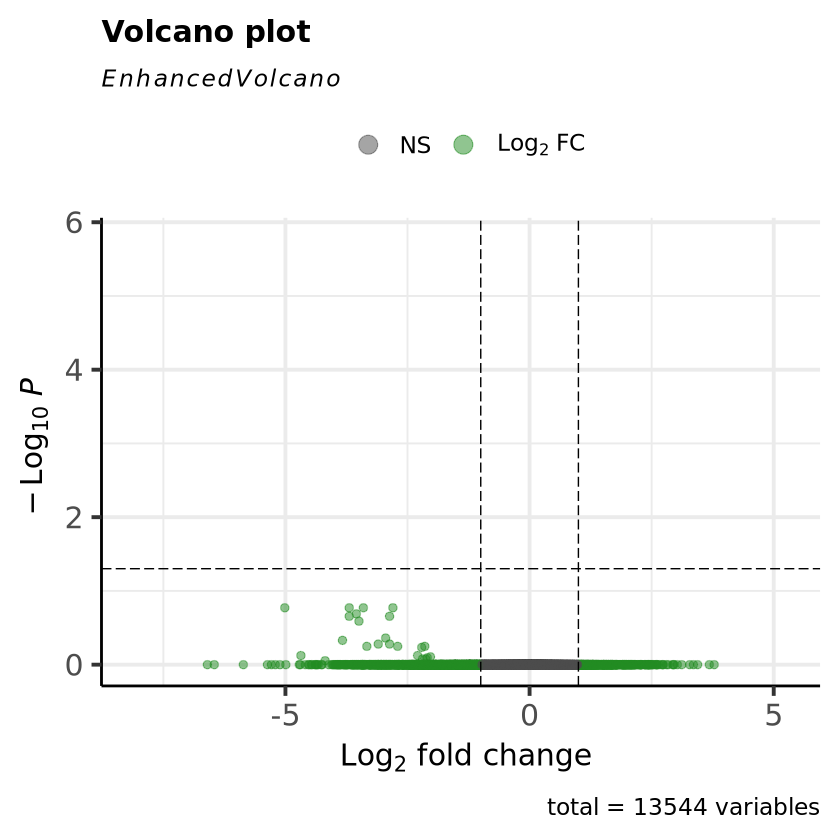

In [77]:
# phase 2 hypoxic vs. both
summary(results1)

EnhancedVolcano(results1, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)


out of 13538 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 10, 0.074%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 6305, 47%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



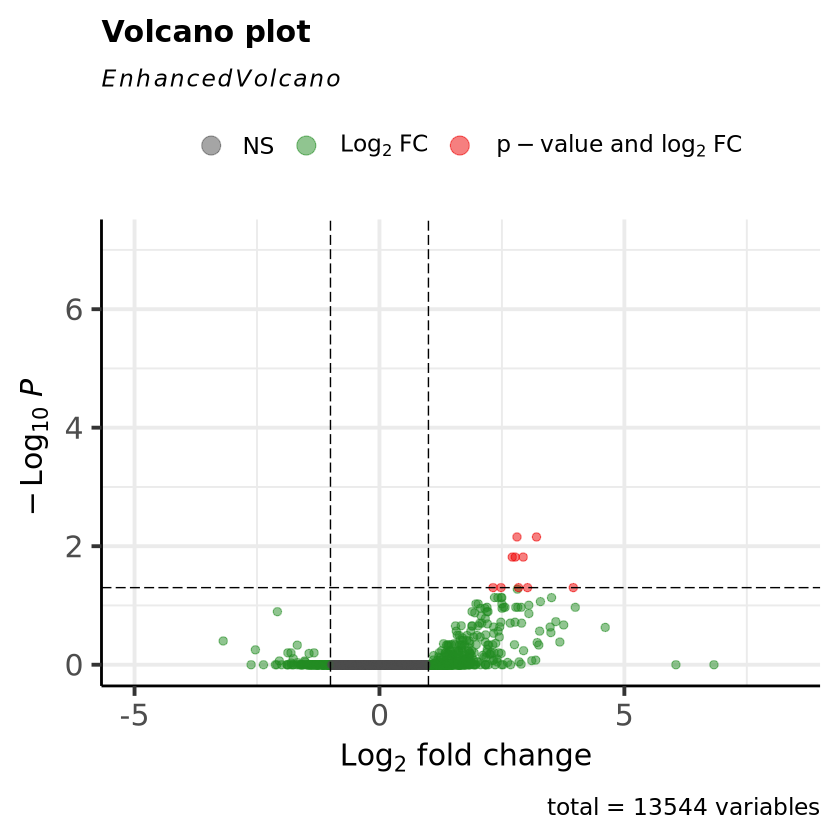

In [78]:
# phase 2 both vs. control
summary(results2)

EnhancedVolcano(results2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

#### Given phase 2, what are the effects of phase 1?
first looking at samples that were **hypoxic for phase 2**

In [79]:
# for phase 2 hypoxic
p2hypoxic_meta = filter(meta_data, meta_data$Phase2 == 'hypoxic')
p2hypoxic_meta 

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,control,hypoxic


In [80]:
# have to make sure counts matrix has the same columns as rows in meta
p2hypoxic_counts = fc_meta[,colnames(fc_meta) %in% p2hypoxic_meta$unique_ID, drop=FALSE]
head(p2hypoxic_counts)

,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,0,0,0,0,1,1,0,0,0,1
LOC111109452,0,0,10,12,0,1,0,0,1,2
LOC111124802,408,244,187,336,311,455,20,122,289,202
LOC111101273,115,75,64,115,137,127,8,43,87,81
LOC111101250,257,118,115,141,184,261,7,91,254,109
LOC111101262,502,364,246,389,355,485,40,184,387,251


In [81]:
p2h_dds <- DESeqDataSetFromMatrix(countData = p2hypoxic_counts,
                              colData = p2hypoxic_meta, 
                              design = ~ Phase1)
p2h_dds=DESeq(p2h_dds)
resultsNames(p2h_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 13371 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 190, 1.4%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



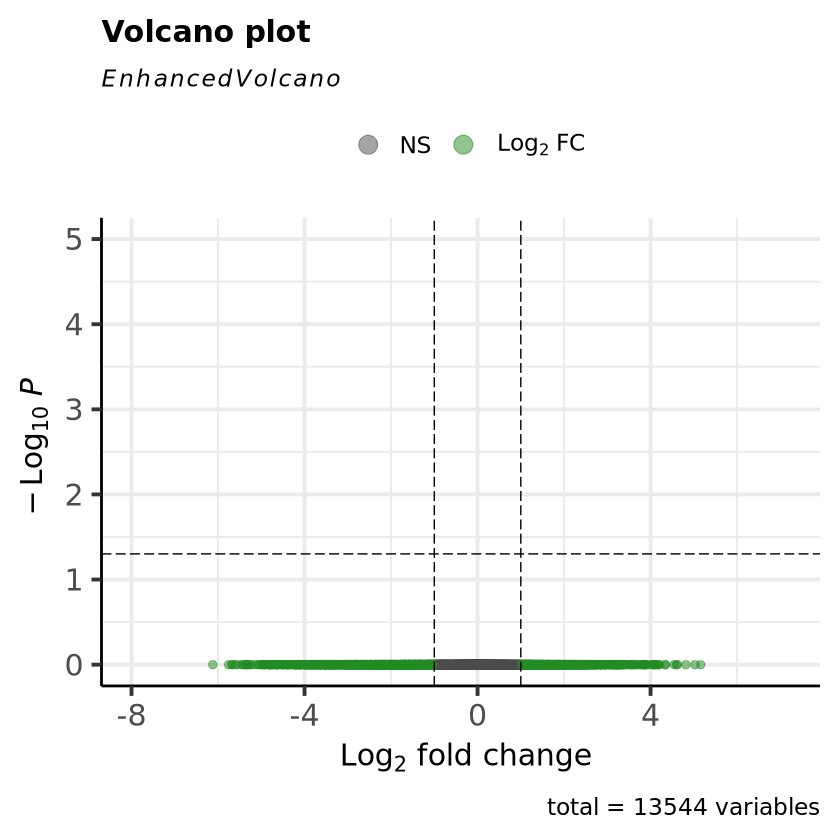

In [82]:
# phase 2 = hypoxic, looking at hypoxic vs. control for phase 1
res_p2h=results(p2h_dds, name="Phase1_hypoxic_vs_control", alpha = 0.05,lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

summary(res_p2h)
   
EnhancedVolcano(res_p2h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

for samples that were **both for phase 2**

In [83]:
# for phase 2 both
p2both_meta = filter(meta_data, meta_data$Phase2 == 'both')
p2both_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2both_counts = fc_meta[,colnames(fc_meta) %in% p2both_meta$unique_ID, drop=FALSE]
head(p2both_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BPO-BPO-O16,2018--BPO-BPO-O16-CV,BPO-BPO-O16,BPO,BPO,O16,hypoxic,warm,O,hypoxic,warm,O,both,both
BPR-BPG-O38,2018--BPR-BPG-O38-CV,BPR-BPG-O38,BPR,BPG,O38,hypoxic,warm,R,hypoxic,warm,G,both,both
BPR-BPR-O02,2018--BPR-BPR-O02-CV,BPR-BPR-O02,BPR,BPR,O02,hypoxic,warm,R,hypoxic,warm,R,both,both
BPY-BPG-O42,2018--BPY-BPG-O42-CV,BPY-BPG-O42,BPY,BPG,O42,hypoxic,warm,Y,hypoxic,warm,G,both,both
BPY-BPY-O29,2018--BPY-BPY-O29-CV,BPY-BPY-O29,BPY,BPY,O29,hypoxic,warm,Y,hypoxic,warm,Y,both,both
WPB-BPG-G45,2018--WPB-BPG-G45-CV,WPB-BPG-G45,WPB,BPG,G45,normoxic,warm,B,hypoxic,warm,G,warm,both
WPO-BPO-G16,2018--WPO-BPO-G16-CV,WPO-BPO-G16,WPO,BPO,G16,normoxic,warm,O,hypoxic,warm,O,warm,both
WPO-BPY-G28,2018--WPO-BPY-G28-CV,WPO-BPY-G28,WPO,BPY,G28,normoxic,warm,O,hypoxic,warm,Y,warm,both
WPR-BPY-G25,2018--WPR-BPY-G25-CV,WPR-BPY-G25,WPR,BPY,G25,normoxic,warm,R,hypoxic,warm,Y,warm,both


,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,1,0,2,1,1,0,0,1,1,0
LOC111109452,1,0,0,0,1,15,0,0,3,0
LOC111124802,56,245,45,33,120,168,134,86,252,9
LOC111101273,15,83,16,5,27,71,52,38,73,1
LOC111101250,25,132,28,12,42,92,49,5,101,2
LOC111101262,67,220,55,46,76,188,131,78,283,12


In [84]:
p2both_dds <- DESeqDataSetFromMatrix(countData = p2both_counts,
                              colData = p2both_meta, 
                              design = ~ Phase1)
p2both_dds=DESeq(p2both_dds)
resultsNames(p2both_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"           "Phase1_warm_vs_both"


out of 12941 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 457, 3.5%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



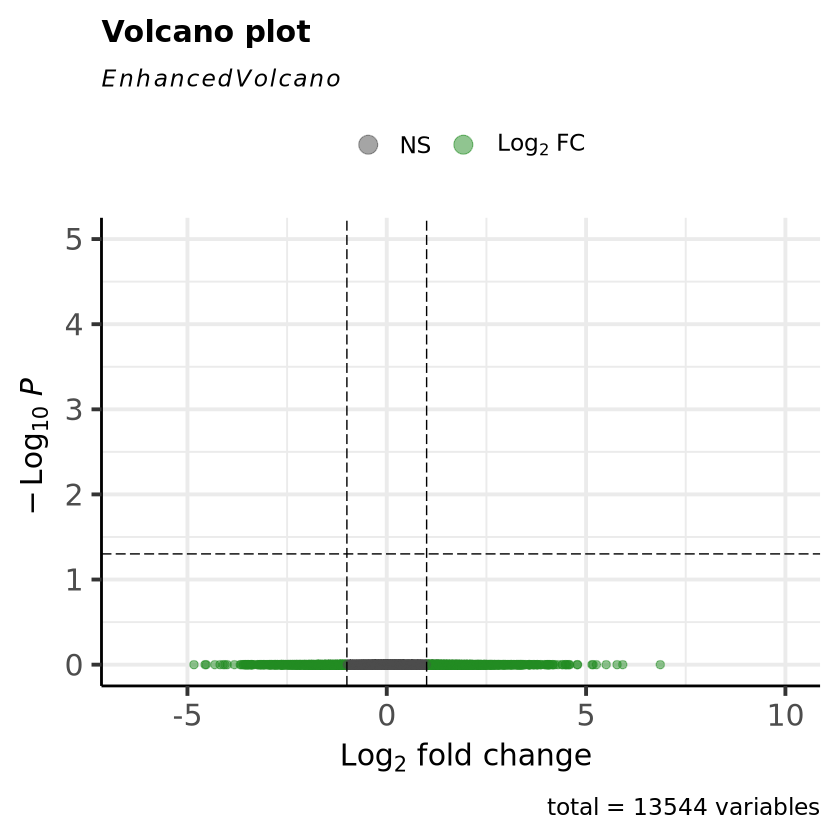

In [85]:
# phase 1 effects (warm vs. both) given phase 2 (both)
res_p2b=results(p2both_dds, name="Phase1_warm_vs_both", alpha = 0.05, lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

summary(res_p2b)
   
EnhancedVolcano(res_p2b,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

for samples that were in **control/ambient conditions for phase 2**

In [86]:
# for phase 2 control
p2control_meta = filter(meta_data, meta_data$Phase2 == 'control')
p2control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2control_counts = fc_meta[,colnames(fc_meta) %in% p2control_meta$unique_ID, drop=FALSE]
head(p2control_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBY-WBG-B42,2018--BBY-WBG-B42-CV,BBY-WBG-B42,BBY,WBG,B42,hypoxic,ambient,Y,normoxic,ambient,G,hypoxic,control
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,control,control


,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,2,0,0,3,0,1,0,0
LOC111109452,0,0,1,1,2,0,0,7,1,0
LOC111124802,597,453,502,434,110,418,76,305,120,57
LOC111101273,173,146,171,158,45,132,49,143,45,18
LOC111101250,253,255,327,269,49,212,56,201,96,24
LOC111101262,645,634,647,677,108,453,102,422,146,52


In [87]:
p2control_dds <- DESeqDataSetFromMatrix(countData = p2control_counts,
                              colData = p2control_meta, 
                              design = ~ Phase1)
p2control_dds=DESeq(p2control_dds)
resultsNames(p2control_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 13322 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 0, 0%
LFC < -0.50 (down) : 1, 0.0075%
outliers [1]       : 286, 2.1%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



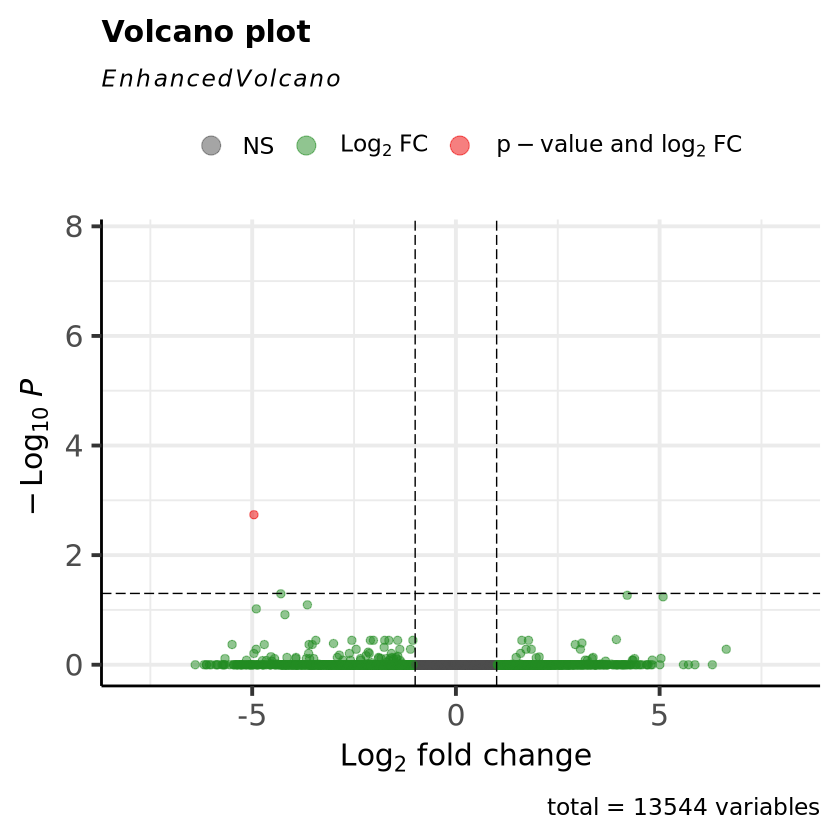

In [88]:
# effects of phase 1 (hypoxic vs. control), given phase 2 (control)
res_p2c=results(p2control_dds, name="Phase1_hypoxic_vs_control", alpha=0.05,lfcThreshold = 0.5, altHypothesis = 'greaterAbs')

summary(res_p2c)
   
EnhancedVolcano(res_p2c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

this is really interesting... when all samples are ambient conditions for phase 2, hypoxia has a large effect on methylation/ there seems to be a lot of differential methylation

#### Given the effects of phase 1, what are the effects of phase 2?
for samples that were **hypoxic for phase 1**

In [89]:
unique(meta_data$Phase1)

[1] "hypoxic" "both"    "control" "warm"

In [90]:
# for phase 1 hypoxic
p1hypoxic_meta = filter(meta_data, meta_data$Phase1 == 'hypoxic')
p1hypoxic_meta  

# have to make sure counts matrix has the same columns as rows in meta
p1hypoxic_counts = fc_meta[,colnames(fc_meta) %in% p1hypoxic_meta$unique_ID, drop=FALSE]
head(p1hypoxic_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic


,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2
LOC111124802,597,453,408,244,502,434,187,336,311,110
LOC111101273,173,146,115,75,171,158,64,115,137,45
LOC111101250,253,255,257,118,327,269,115,141,184,49
LOC111101262,645,634,502,364,647,677,246,389,355,108


In [117]:
p1hypoxic_dds <- DESeqDataSetFromMatrix(countData = p1hypoxic_counts,
                              colData = p1hypoxic_meta, 
                              design = ~ Phase2)
p1hypoxic_dds=DESeq(p1hypoxic_dds)
resultsNames(p1hypoxic_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"


out of 13397 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 89, 0.66%
LFC < -0.50 (down) : 14, 0.1%
outliers [1]       : 302, 2.3%
low counts [2]     : 3806, 28%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



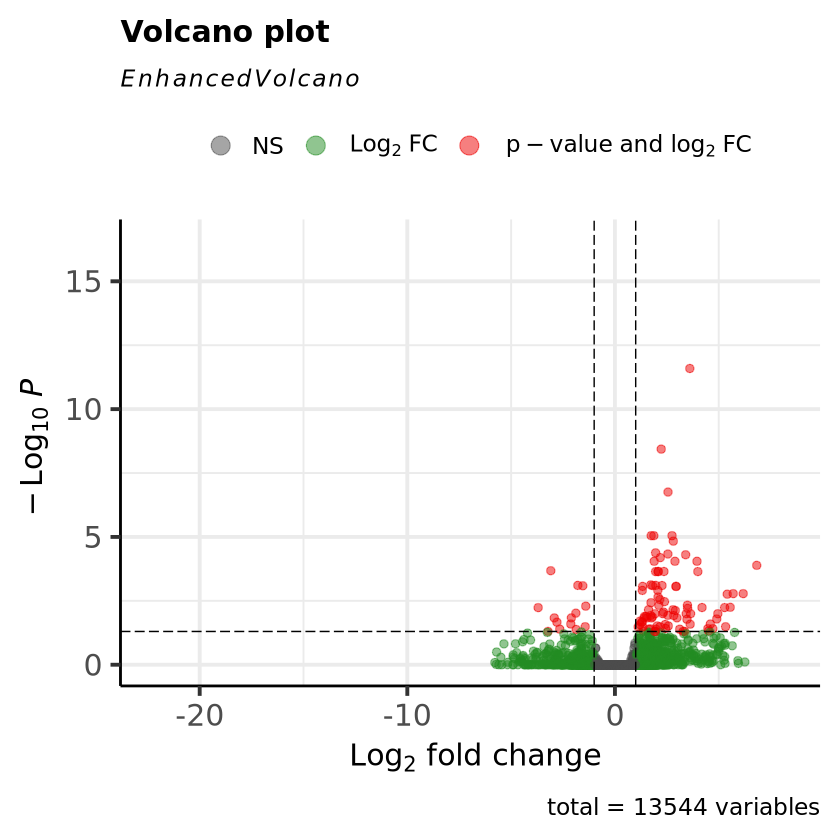

In [118]:
# effects of phase 2 (hypoxic vs. control), given phase 1 (hypoxic)
res_p1h=results(p1hypoxic_dds, name="Phase2_hypoxic_vs_control", alpha=0.05, lfcThreshold = 0.5)

summary(res_p1h)
   
EnhancedVolcano(res_p1h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

samples that were both for phase 1 were only both for phase 2 - so can't do any specific comparison for those samples/treatments

samples that were warm for phase 1 were only both for phase 2 - so again, can't do any analysis there

for samples that were **control for phase 1**

In [93]:
# for phase 1 contol
p1control_meta = filter(meta_data, meta_data$Phase1 == 'control')
p1control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p1control_counts = fc_meta[,colnames(fc_meta) %in% p1control_meta$unique_ID, drop=FALSE]
head(p1control_meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,control,control
WBV-WBR-W12,2018--WBV-WBR-W12-CV,WBV-WBR-W12,WBV,WBR,W12,normoxic,ambient,V,normoxic,ambient,R,control,control
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,control,hypoxic


,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic


In [94]:
p1control_dds <- DESeqDataSetFromMatrix(countData = p1control_counts,
                              colData = p1control_meta, 
                              design = ~ Phase2)
p1control_dds=DESeq(p1control_dds)
resultsNames(p1control_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"


out of 13274 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 1, 0.0075%
LFC < -0.50 (down) : 0, 0%
outliers [1]       : 175, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



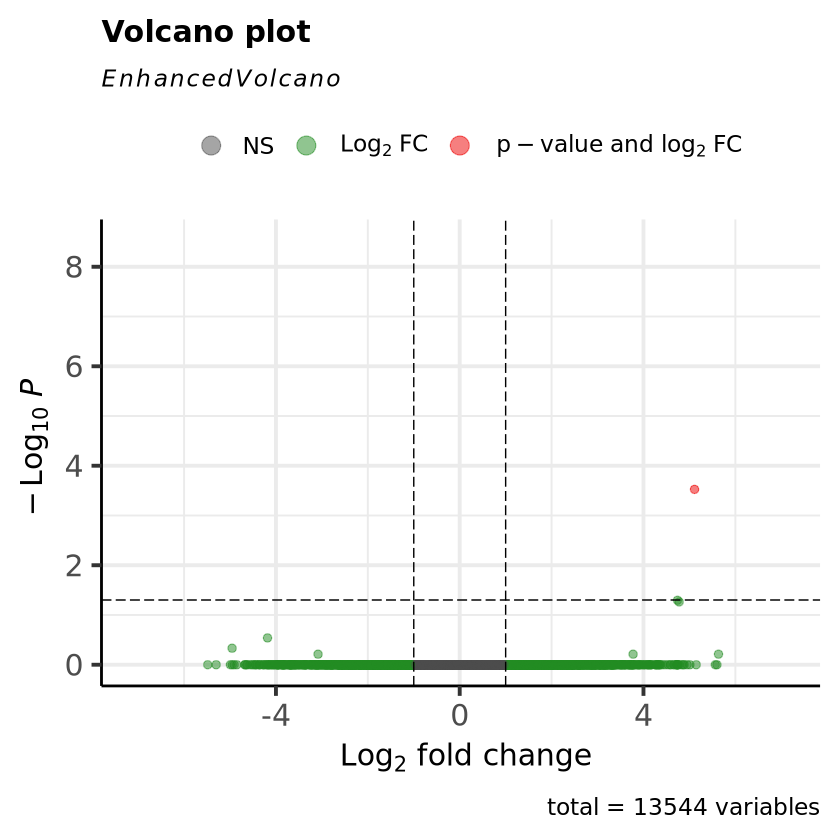

In [100]:
# effects of phase 2 (hypoxic vs. control), given phase 1 (control)
res_p1c=results(p1control_dds, name="Phase2_hypoxic_vs_control", alpha=0.05, lfcThreshold=0.5)

summary(res_p1c)
   
EnhancedVolcano(res_p1c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### lfcShrink *and* lfcThreshold

just looking at phase 1 warm vs. control samples

In [108]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = fc_meta,
                              colData = meta_data, 
                              design = ~ Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 607 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase1_control_vs_both" "Phase1_hypoxic_vs_both"
[4] "Phase1_warm_vs_both"

In [110]:
# specify contrasts (what treatments to compare)
contrast3 <- c("Phase1", "warm", "control")

In [113]:
lfc_shrink<-lfcShrink(p1_dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      type="normal")
head(lfc_shrink)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): Phase1 warm vs control 
Wald test p-value: Phase1 warm vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC111120752   0.917103       0.511735  0.721948  0.722856 0.4697683        NA
LOC111109452   1.369236       1.007255  0.720575  1.284407 0.1989997        NA
LOC111124802 160.733119       0.459166  0.187997  2.443946 0.0145276 0.1249623
LOC111101273  55.040476       0.405567  0.225826  1.812600 0.0698936 0.3513925
LOC111101250  77.794778      -0.602775  0.203194 -2.960119 0.0030752 0.0392196
LOC111101262 188.903905       0.167463  0.179519  0.935214 0.3496780 0.7571724

looking again at what lfcShrink looks like


out of 13538 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 815, 6%
LFC < 0 (down)     : 48, 0.35%
outliers [1]       : 290, 2.1%
low counts [2]     : 5220, 39%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



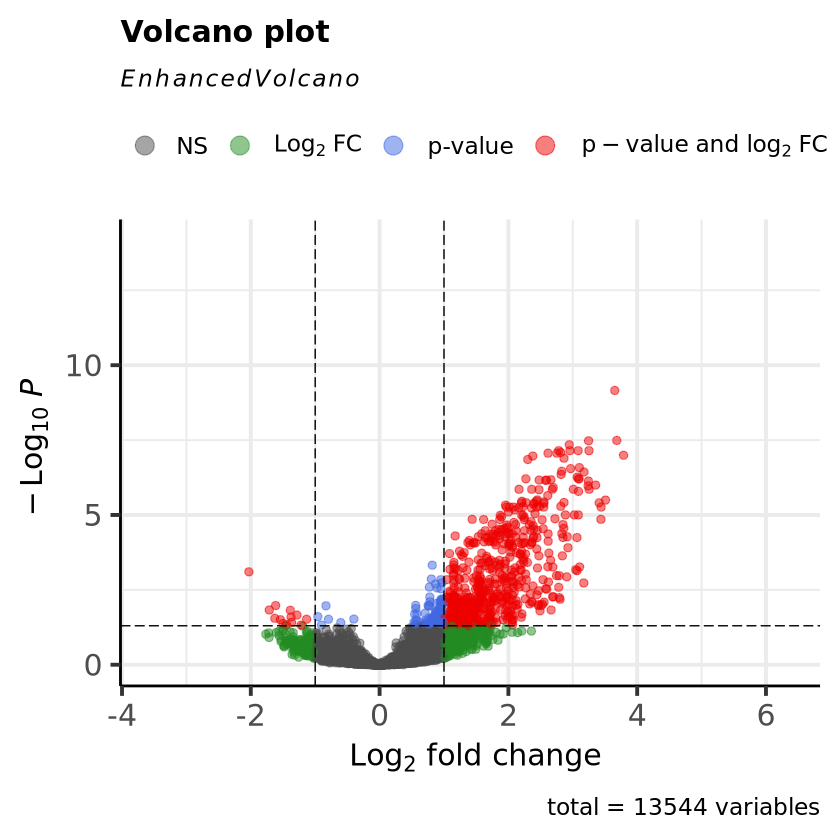

In [112]:
## LFC SHRINK
# phase 1 hypoxic vs. control
summary(lfc_shrink)

EnhancedVolcano(lfc_shrink, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

now taking adding lfcThreshold to lfcShrink()

In [116]:
# Phase 1 warm vs. control
lfc_shrink2 <-lfcShrink(p1_dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      lfcThreshold = 0.5,
                      type="apeglm")
head(lfc_shrink2)

ERROR: Error in lfcShrink(p1_dds, contrast = contrast3, lfcThreshold = 0.5, type = "apeglm"): type='apeglm' shrinkage only for use with 'coef'



out of 13538 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.50 (up)    : 240, 1.8%
LFC < -0.50 (down) : 1, 0.0074%
outliers [1]       : 601, 4.4%
low counts [2]     : 5175, 38%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



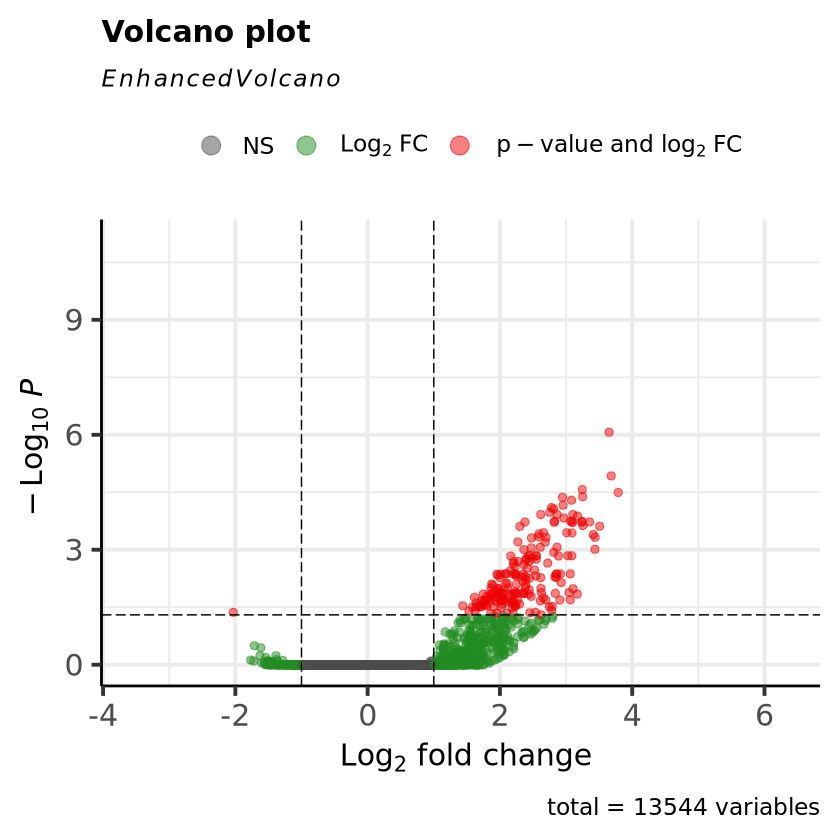

In [115]:
## LFC SHRINK WITH LFCTHRESHOLD
# phase 1 hypoxic vs. control
summary(lfc_shrink2)

EnhancedVolcano(lfc_shrink2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

#### Different types of shrinkage estimators
there's 3 different types of shrinkage estimators - apeglm, ashr, and normal
> documentation on shrinkage estimators found [here](https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#moreshrink)

it's been suggested that normal is not the best estimator, the other 2 have less biases

so looking at the different kinds in a different data set: hypoxic phase 1, hypoxic or control for phase 2


out of 13397 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.50 (up)    : 89, 0.66%
LFC < -0.50 (down) : 14, 0.1%
outliers [1]       : 302, 2.3%
low counts [2]     : 3806, 28%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



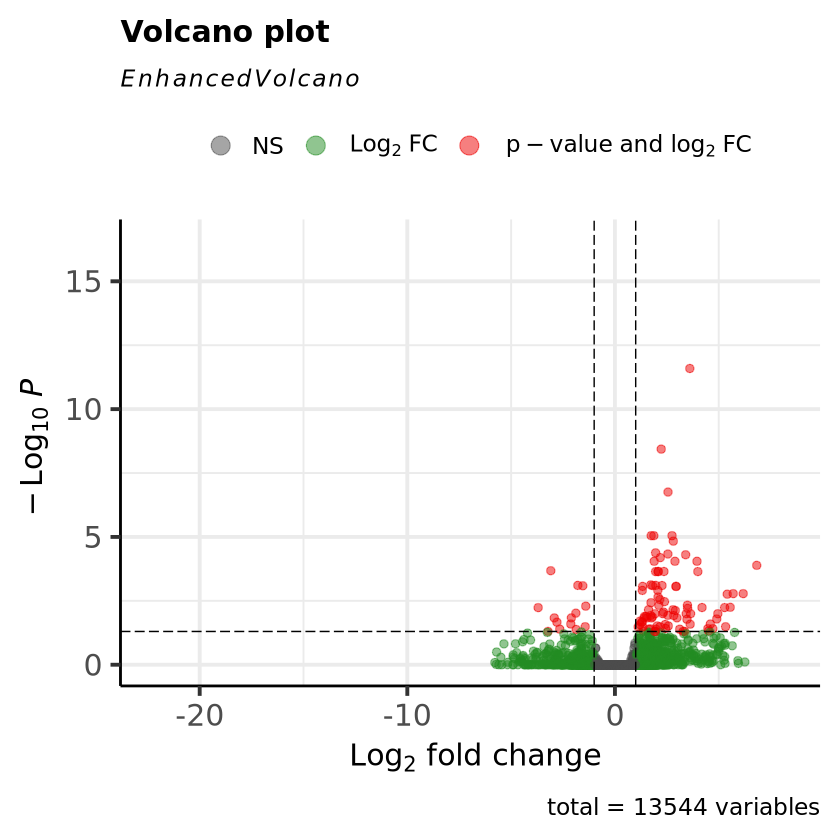

In [118]:
# effects of phase 2 (hypoxic vs. control), given phase 1 (hypoxic)
res_p1h=results(p1hypoxic_dds, name="Phase2_hypoxic_vs_control", alpha=0.05, lfcThreshold = 0.5)

summary(res_p1h)
   
EnhancedVolcano(res_p1h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): Phase2 hypoxic vs control 
Wald test p-value: Phase2 hypoxic vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC111120752   0.478403     -0.2379021  0.275015         0         1        NA
LOC111109452   3.338687      0.3118057  0.295614         0         1         1
LOC111124802 316.608142     -0.0783942  0.103373         0         1         1
LOC111101273 107.996235     -0.0565100  0.124215         0         1         1
LOC111101250 171.639752     -0.0490607  0.158519         0         1         1
LOC111101262 399.065246     -0.0704963  0.131192         0         1         1


out of 13397 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.50 (up)    : 66, 0.49%
LFC < -0.50 (down) : 9, 0.067%
outliers [1]       : 302, 2.3%
low counts [2]     : 3570, 27%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



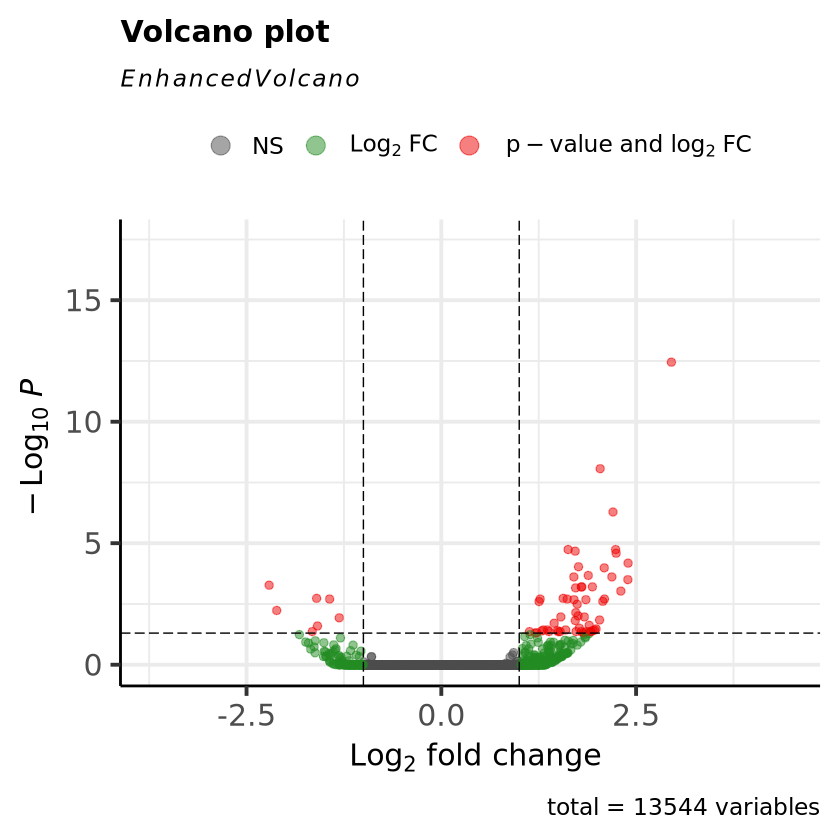

In [127]:
## with type NORMAL

# effects of phase 2 (hypoxic vs. control), given phase 1 (hypoxic)
resNorm <-lfcShrink(p1hypoxic_dds, # dds object
                      contrast = c('Phase2', 'hypoxic', 'control'), # only coef or contrast can be specified
                      lfcThreshold = 0.5,
                      type="normal")
head(resNorm)

summary(resNorm)
   
EnhancedVolcano(resNorm,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=0.5)



log2 fold change (MAP): Phase2 hypoxic vs control 
 
DataFrame with 6 rows and 4 columns
               baseMean log2FoldChange     lfcSE    svalue
              <numeric>      <numeric> <numeric> <numeric>
LOC111120752   0.478403     -0.0478424  0.328613  0.688878
LOC111109452   3.338687      0.0613843  0.331844  0.662351
LOC111124802 316.608142     -0.0723917  0.100514  0.821693
LOC111101273 107.996235     -0.0504720  0.119226  0.820353
LOC111101250 171.639752     -0.0407040  0.147893  0.817296
LOC111101262 399.065246     -0.0620293  0.125199  0.819505


out of 13397 with nonzero total read count
s-value < 0.005
LFC > 0.50 (up)    : 175, 1.3%
LFC < -0.50 (down) : 45, 0.34%



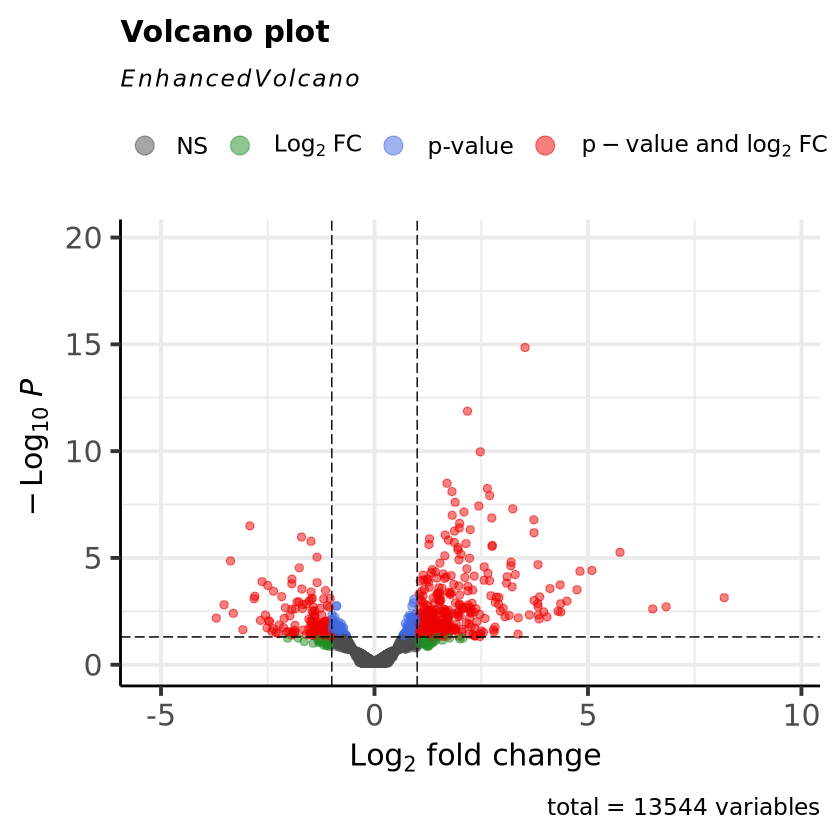

In [133]:
## with type APEGML (generally has less bias according to vignette

# effects of phase 2 (hypoxic vs. control), given phase 1 (hypoxic)
resLFC <-lfcShrink(p1hypoxic_dds, # dds object
                      coef = 2, # only coef or contrast can be specified
                      lfcThreshold = 0.5,
                      type="apeglm")
head(resLFC)

summary(resLFC)
   
EnhancedVolcano(resLFC,
                lab=NA,
                x = 'log2FoldChange',
                y = 'svalue', pCutoff=0.05)

the above plot looks really weird compared to what we've seen so far for these plots - but we've recovered some of those DMGs

thresholding s-values on alpha=0.005 to color points



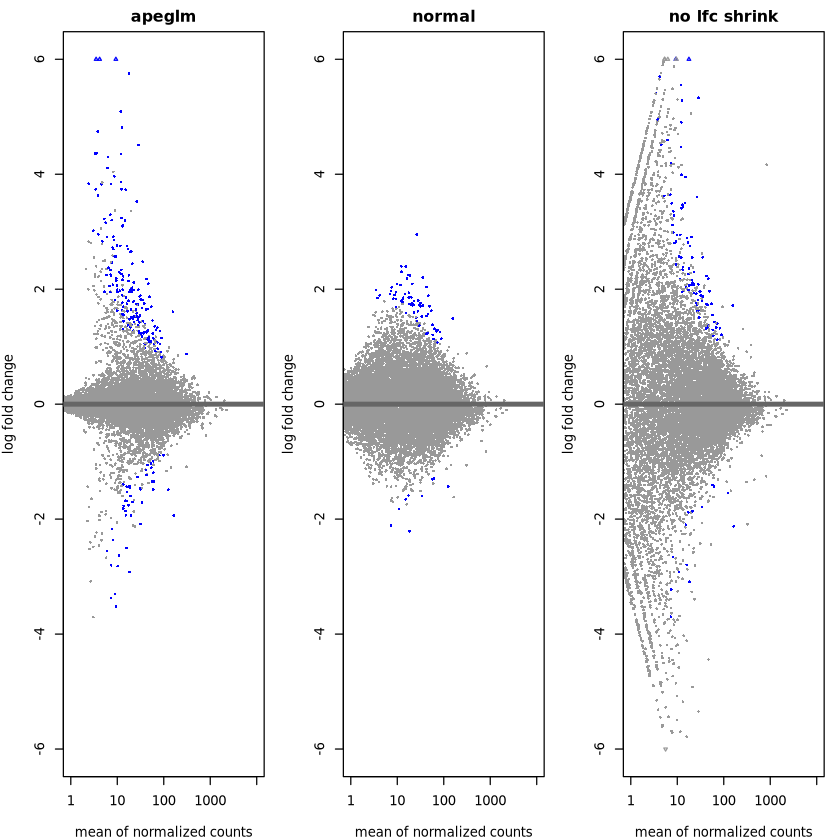

In [131]:
par(mfrow=c(1,3), mar=c(4,4,2,1))
xlim <- c(1,1e4); ylim <- c(-6,6)
plotMA(resLFC, xlim=xlim, ylim=ylim, main="apeglm")
plotMA(resNorm, xlim=xlim, ylim=ylim, main="normal")
plotMA(res_p1h, xlim=xlim, ylim=ylim, main="no lfc shrink")

not sure how to interpret this yet - but normal type doesn't look like the best option?